### Comparing Models

Now that you have seen a variety of models for regression and classification problems, it is good to step back and weigh the pros and cons of these options.  In the case of classification models, there are at least three things to consider:

1. Is the model good at handling imbalanced classes?
2. Does the model train quickly?
3. Does the model yield interpretable results?

Depending on your dataset and goals, the importance of these considerations will vary from project to project.  Your goal is to review our models to this point and discuss the pros and cons of each.  Two example datasets are offered as a way to offer two very different tasks where interpretability of the model may be of differing importance.

### Data and Task

Your goal is to discuss the pros and cons of Logistic Regression, Decision Trees, KNN, and SVM for the tasks below.  Consider at least the three questions above and list any additional considerations you believe are important to determining the "best" model for the task.  Share your response with your peers on the class discussion board.  

**TASK 1**: Predicting Customer Churn

Suppose you are tasked with producing a model to predict customer churn.  Which of your classification models would you use and what are the pros and cons of this model for this task?  Be sure to consider interpretability, imbalnced classes, and the speed of training.



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [102]:
from sklearn.datasets import load_digits

The data is loaded below.  Note that the handwritten digit data is already split into features and target (`digits`, `labels`). 

In [97]:
churn = pd.read_csv('data/telecom_churn.csv')
digits, labels = load_digits(return_X_y=True)

$$
Churn\\
\begin{array}{cccccc}
 & LogReg & KNN & RBF-SVC & DTree & Data\\
Best Test \% & 86.0 & 87.4 & 88.4 & 94.9 & 85.5\\
AvgFitTime & 57.2s & 18.6s & 37.4s & 42.7s & --
\end{array}$$

In [119]:
#churn data
churn['International plan'] = churn['International plan'].map({'No':0, 'Yes':1})
churn['Voice mail plan'] = churn['Voice mail plan'].map({'No':0, 'Yes':1})
churn


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [183]:
churn['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [181]:
digits.shape[0]

1797

In [154]:
churn['Churn'].value_counts()[0]/churn['Churn'].value_counts().sum()

0.8550855085508551

In [120]:
X_train, X_test, y_train, y_test = train_test_split(churn.drop(['State','Churn'], axis=1), churn['Churn'], test_size = .3)

In [159]:
%time model.fit(X_train, y_train)

CPU times: user 37.1 s, sys: 301 ms, total: 37.4 s
Wall time: 44 s


SVC(gamma=3.5111917342151275e-06, kernel='linear')

In [156]:
train = []
test = []
for gamma in np.logspace(-7, 2, 100):
    model = SVC(kernel = 'linear', gamma = gamma)
    model.fit(X_train, y_train)
    tr = model.score(X_train, y_train)
    te = model.score(X_test, y_test)
    print('gamma = %.1e, train: %.5f, test: %.5f'%(gamma, tr, te))
    train.append(tr)
    test.append(te)
    if te == max(test): best_model  = model

gamma = 1.0e-07, train: 0.86027, test: 0.86100
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.25 µs
gamma = 1.2e-07, train: 0.86027, test: 0.86100
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs
gamma = 1.5e-07, train: 0.86027, test: 0.86100
CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs
gamma = 1.9e-07, train: 0.86027, test: 0.86100
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
gamma = 2.3e-07, train: 0.86027, test: 0.86100
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.78 µs
gamma = 2.8e-07, train: 0.86027, test: 0.86100
CPU times: user 11 µs, sys: 2 µs, total: 13 µs
Wall time: 19.1 µs
gamma = 3.5e-07, train: 0.86027, test: 0.86100
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 4.77 µs
gamma = 4.3e-07, train: 0.86027, test: 0.86100
CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 11.2 µs
gamma = 5.3e-07, train: 0.86027, test: 0.86100
CPU times: user 3 µs, sys: 1 µs, total: 4 µ

KeyboardInterrupt: 

Text(0.5, 0, 'Gamma')

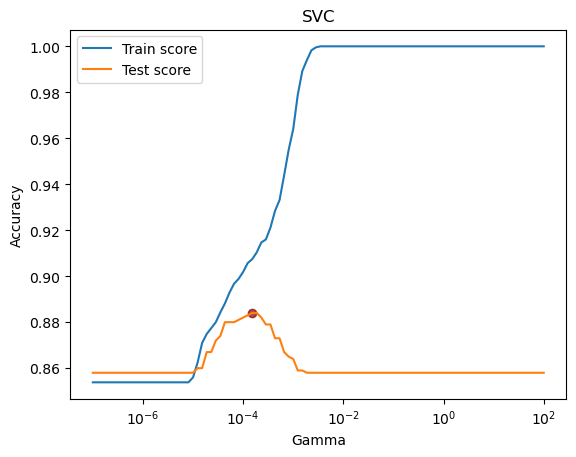

In [150]:
plt.plot(np.logspace(-7,2,100), train, label = 'Train score')
plt.plot(np.logspace(-7,2,100), test, label = 'Test score')
plt.xscale('log')
plt.legend()
plt.scatter(np.logspace(-7,2,100)[test.index(max(test))], max(test), marker='o', color = 'darkred', alpha=.7, label = 'Test Score maximum')


plt.ylabel('Accuracy')
plt.title('SVC')
plt.xlabel('Gamma')

In [125]:
%time
best_model.predict(X_train)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs


array([False, False, False, ..., False, False, False])

In [161]:
#model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
%time model.fit(X_train, y_train)

CPU times: user 33.3 ms, sys: 9.37 ms, total: 42.7 ms
Wall time: 56.1 ms


DecisionTreeClassifier(max_depth=10000000000.0)

In [126]:
train_t = []
test_t = []
for depth in np.logspace(0,10, 100):
    model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    model.fit(X_train, y_train)
    tr = model.score(X_train, y_train)
    te = model.score(X_test, y_test)
    print('depth = %.1e, train: %.5f, test: %.5f'%(depth, tr, te))
    train_t.append(tr)
    test_t.append(te)
    if te == max(test_t): best_model_t  = model

depth = 1.0e+00, train: 0.87055, test: 0.86200
depth = 1.3e+00, train: 0.87055, test: 0.86200
depth = 1.6e+00, train: 0.87055, test: 0.86200
depth = 2.0e+00, train: 0.88170, test: 0.87700
depth = 2.5e+00, train: 0.88170, test: 0.87700
depth = 3.2e+00, train: 0.90613, test: 0.90400
depth = 4.0e+00, train: 0.93013, test: 0.92000
depth = 5.1e+00, train: 0.95285, test: 0.94200
depth = 6.4e+00, train: 0.96357, test: 0.94900
depth = 8.1e+00, train: 0.97557, test: 0.94200
depth = 1.0e+01, train: 0.98157, test: 0.94300
depth = 1.3e+01, train: 0.98543, test: 0.93600
depth = 1.6e+01, train: 0.99700, test: 0.92700
depth = 2.1e+01, train: 1.00000, test: 0.92500
depth = 2.6e+01, train: 1.00000, test: 0.92700
depth = 3.3e+01, train: 1.00000, test: 0.92400
depth = 4.1e+01, train: 1.00000, test: 0.92800
depth = 5.2e+01, train: 1.00000, test: 0.92600
depth = 6.6e+01, train: 1.00000, test: 0.92200
depth = 8.3e+01, train: 1.00000, test: 0.91300
depth = 1.0e+02, train: 1.00000, test: 0.92800
depth = 1.3e+

Text(0.5, 0, 'Maximum Depth')

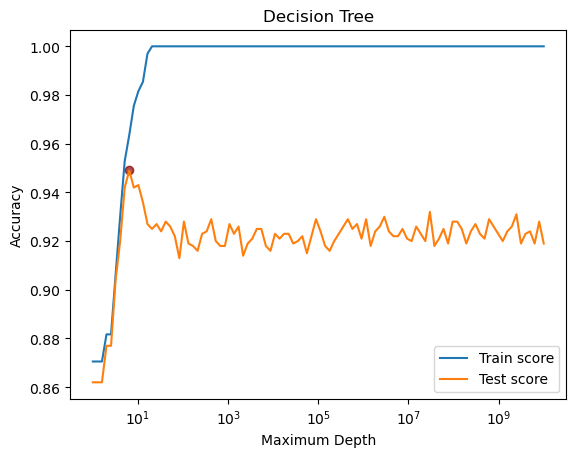

In [138]:
plt.plot(np.logspace(0,10,100), train_t, label = 'Train score')
plt.plot(np.logspace(0,10,100), test_t, label = 'Test score')
plt.xscale('log')
plt.legend()
plt.scatter(np.logspace(0,10,100)[test_t.index(max(test_t))], max(test_t), marker='o', color = 'darkred', alpha=.7, label = 'Test Score maximum')


plt.ylabel('Accuracy')
plt.title('Decision Tree')
plt.xlabel('Maximum Depth')

In [128]:
%time
best_model_t.predict(X_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.82 µs


array([False, False, False, ..., False,  True, False])

In [163]:
#model = LogisticRegression(tol=tol)
%time model.fit(X_train, y_train)

CPU times: user 18 ms, sys: 39.1 ms, total: 57.2 ms
Wall time: 197 ms


LogisticRegression(tol=10000.0)

In [129]:
from sklearn.linear_model import LogisticRegression

train_l = []
test_l = []
for tol in np.logspace(-20,4, 100):
    model = LogisticRegression(tol=tol)
    model.fit(X_train, y_train)
    tr = model.score(X_train, y_train)
    te = model.score(X_test, y_test)
    print('depth = %.1e, train: %.5f, test: %.5f'%(tol, tr, te))
    train_l.append(tr)
    test_l.append(te)
    if te == max(test_l): best_model_l  = model

/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.0e-20, train: 0.85769, test: 0.86000
depth = 1.7e-20, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 3.1e-20, train: 0.85769, test: 0.86000
depth = 5.3e-20, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 9.3e-20, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.6e-19, train: 0.85769, test: 0.86000
depth = 2.8e-19, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 5.0e-19, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 8.7e-19, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 1.5e-18, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 2.7e-18, train: 0.85769, test: 0.86000
depth = 4.6e-18, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 8.1e-18, train: 0.85769, test: 0.86000
depth = 1.4e-17, train: 0.85769, test: 0.86000
depth = 2.5e-17, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 4.3e-17, train: 0.85769, test: 0.86000
depth = 7.6e-17, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 1.3e-16, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 2.3e-16, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 4.0e-16, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 7.1e-16, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 1.2e-15, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 2.2e-15, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 3.8e-15, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 6.6e-15, train: 0.85769, test: 0.86000
depth = 1.1e-14, train: 0.85769, test: 0.86000
depth = 2.0e-14, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 3.5e-14, train: 0.85769, test: 0.86000
depth = 6.1e-14, train: 0.85769, test: 0.86000
depth = 1.1e-13, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 1.9e-13, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 3.3e-13, train: 0.85769, test: 0.86000
depth = 5.7e-13, train: 0.85769, test: 0.86000
depth = 1.0e-12, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.7e-12, train: 0.85769, test: 0.86000
depth = 3.1e-12, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 5.3e-12, train: 0.85769, test: 0.86000
depth = 9.3e-12, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.6e-11, train: 0.85769, test: 0.86000
depth = 2.8e-11, train: 0.85769, test: 0.86000
depth = 5.0e-11, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 8.7e-11, train: 0.85769, test: 0.86000
depth = 1.5e-10, train: 0.85769, test: 0.86000
depth = 2.7e-10, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 4.6e-10, train: 0.85769, test: 0.86000
depth = 8.1e-10, train: 0.85769, test: 0.86000
depth = 1.4e-09, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 2.5e-09, train: 0.85769, test: 0.86000
depth = 4.3e-09, train: 0.85769, test: 0.86000
depth = 7.6e-09, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.3e-08, train: 0.85769, test: 0.86000
depth = 2.3e-08, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 4.0e-08, train: 0.85769, test: 0.86000
depth = 7.1e-08, train: 0.85769, test: 0.86000
depth = 1.2e-07, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 2.2e-07, train: 0.85769, test: 0.86000
depth = 3.8e-07, train: 0.85769, test: 0.86000
depth = 6.6e-07, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.1e-06, train: 0.85769, test: 0.86000
depth = 2.0e-06, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 3.5e-06, train: 0.85769, test: 0.86000
depth = 6.1e-06, train: 0.85769, test: 0.86000
depth = 1.1e-05, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.9e-05, train: 0.85769, test: 0.86000
depth = 3.3e-05, train: 0.85769, test: 0.86000
depth = 5.7e-05, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.0e-04, train: 0.85769, test: 0.86000
depth = 1.7e-04, train: 0.85769, test: 0.86000
depth = 3.1e-04, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 5.3e-04, train: 0.85769, test: 0.86000
depth = 9.3e-04, train: 0.85769, test: 0.86000
depth = 1.6e-03, train: 0.85769, test: 0.86000
depth = 2.8e-03, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 5.0e-03, train: 0.85769, test: 0.86000
depth = 8.7e-03, train: 0.85769, test: 0.86000
depth = 1.5e-02, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 2.7e-02, train: 0.85769, test: 0.86000
depth = 4.6e-02, train: 0.85769, test: 0.86000
depth = 8.1e-02, train: 0.85769, test: 0.86000
depth = 1.4e-01, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 2.5e-01, train: 0.85769, test: 0.86000
depth = 4.3e-01, train: 0.85769, test: 0.86000
depth = 7.6e-01, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.3e+00, train: 0.85769, test: 0.86000
depth = 2.3e+00, train: 0.85769, test: 0.86000
depth = 4.0e+00, train: 0.85769, test: 0.86000
depth = 7.1e+00, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.2e+01, train: 0.85769, test: 0.86000
depth = 2.2e+01, train: 0.85769, test: 0.86000
depth = 3.8e+01, train: 0.85769, test: 0.86000


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 6.6e+01, train: 0.85769, test: 0.86000
depth = 1.1e+02, train: 0.85598, test: 0.85800
depth = 2.0e+02, train: 0.85984, test: 0.85900
depth = 3.5e+02, train: 0.85769, test: 0.85900
depth = 6.1e+02, train: 0.85941, test: 0.86000
depth = 1.1e+03, train: 0.85684, test: 0.85700
depth = 1.9e+03, train: 0.85684, test: 0.85700
depth = 3.3e+03, train: 0.85684, test: 0.85700
depth = 5.7e+03, train: 0.85684, test: 0.85700
depth = 1.0e+04, train: 0.85384, test: 0.85800


Text(0.5, 0, 'Tolerance')

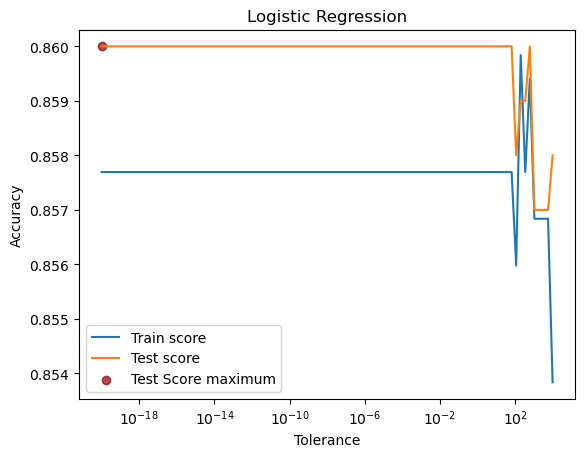

In [137]:
plt.plot(np.logspace(-20,4,100), train_l, label = 'Train score')
plt.plot(np.logspace(-20,4,100), test_l, label = 'Test score')
plt.scatter(np.logspace(-20,4,100)[test_l.index(max(test_l))], max(test_l), marker='o', color = 'darkred', alpha=.7, label = 'Test Score maximum')
plt.xscale('log')
plt.legend()

plt.ylabel('Accuracy')
plt.title('Logistic Regression')
plt.xlabel('Tolerance')

In [131]:
%time
best_model_l.predict(X_train)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs


array([False, False, False, ..., False, False, False])

In [165]:
#model = KNeighborsClassifier(n_neighbors=n)
%time model.fit(X_train, y_train)

CPU times: user 6.47 ms, sys: 12.1 ms, total: 18.6 ms
Wall time: 25.2 ms


KNeighborsClassifier(n_neighbors=99)

In [132]:
from sklearn.neighbors import KNeighborsClassifier

train_k = []
test_k = []
for n in np.arange(1,100):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    tr = model.score(X_train, y_train)
    te = model.score(X_test, y_test)
    print('n = %.1e, train: %.5f, test: %.5f'%(n, tr, te))
    train_k.append(tr)
    test_k.append(te)
    if te == max(test_k): best_model_k  = model

n = 1.0e+00, train: 1.00000, test: 0.80300
n = 2.0e+00, train: 0.90441, test: 0.86500
n = 3.0e+00, train: 0.90784, test: 0.85700
n = 4.0e+00, train: 0.89541, test: 0.87000
n = 5.0e+00, train: 0.89584, test: 0.87100
n = 6.0e+00, train: 0.88898, test: 0.87200
n = 7.0e+00, train: 0.89156, test: 0.87200
n = 8.0e+00, train: 0.88598, test: 0.87000
n = 9.0e+00, train: 0.88598, test: 0.87200
n = 1.0e+01, train: 0.88255, test: 0.87300
n = 1.1e+01, train: 0.88598, test: 0.87400
n = 1.2e+01, train: 0.88127, test: 0.87100
n = 1.3e+01, train: 0.88427, test: 0.87000
n = 1.4e+01, train: 0.88041, test: 0.86900
n = 1.5e+01, train: 0.88255, test: 0.87400
n = 1.6e+01, train: 0.87955, test: 0.87000
n = 1.7e+01, train: 0.88298, test: 0.87100
n = 1.8e+01, train: 0.87784, test: 0.86700
n = 1.9e+01, train: 0.87870, test: 0.87100
n = 2.0e+01, train: 0.87655, test: 0.86700
n = 2.1e+01, train: 0.87698, test: 0.86800
n = 2.2e+01, train: 0.87441, test: 0.86500
n = 2.3e+01, train: 0.87484, test: 0.86500
n = 2.4e+01

Text(0.5, 0, 'Number of Neighbors')

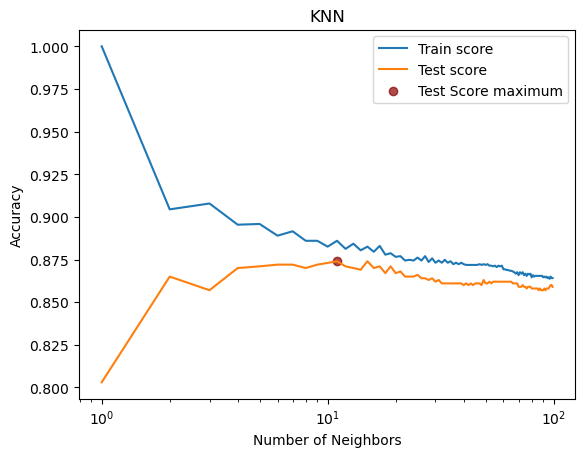

In [133]:
plt.plot(np.arange(1,100), train_k, label = 'Train score')
plt.plot(np.arange(1,100), test_k, label = 'Test score')
plt.scatter(np.arange(1,100)[test_k.index(max(test_k))], max(test_k), marker='o', color = 'darkred', alpha=.7, label = 'Test Score maximum')
plt.xscale('log')
plt.legend()

plt.ylabel('Accuracy')
plt.title('KNN')
plt.xlabel('Number of Neighbors')

In [134]:
%time
best_model_k.predict(X_train)

CPU times: user 14 µs, sys: 12 µs, total: 26 µs
Wall time: 590 µs


array([False, False, False, ..., False, False, False])

**TASK 2**: Recognizing Handwritten Digits

Suppose you are tasked with training a model to recognize handwritten digits.  Which of your classifier would you use here and why?  Again, be sure to consider the balance of classes, speed of training, and importance of interpretability.



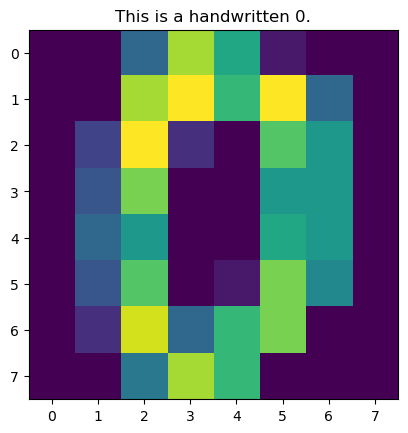

In [103]:
#example image
plt.imshow(digits[0].reshape(8, 8))
plt.title('This is a handwritten 0.');

$$
Digits\\
\begin{array}{cccccc}
 & LogReg & KNN & RBF-SVC & DTree & Data\\
Best Test \% &96.5 & 98.7 & 99.4 & 89.4 & 50.6\\
Predict Time & 32.6ms & 2.64ms & 207ms & 17.8ms & --
\end{array}$$

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [178]:
z = np.where(labels == 0)[0].shape[0]
o = np.where(labels == 1)[0].shape[0]
o / (z+o)

0.5055555555555555

In [166]:
X_train, X_test, y_train, y_test = train_test_split(digits, labels, test_size = .3)

In [168]:
#model = SVC(kernel = 'rbf', gamma = gamma)
%time model.fit(X_train, y_train)

CPU times: user 179 ms, sys: 28.1 ms, total: 207 ms
Wall time: 250 ms


SVC(gamma=3.5111917342151275e-06)

In [105]:
train = []
test = []
for gamma in np.logspace(-7, 2, 100):
    model = SVC(kernel = 'rbf', gamma = gamma)
    model.fit(X_train, y_train)
    tr = model.score(X_train, y_train)
    te = model.score(X_test, y_test)
    print('gamma = %.1e, train: %.5f, test: %.5f'%(gamma, tr, te))
    train.append(tr)
    test.append(te)
    if te == max(test): best_model  = model

gamma = 1.0e-07, train: 0.11535, test: 0.06481
gamma = 1.2e-07, train: 0.11535, test: 0.06481
gamma = 1.5e-07, train: 0.11535, test: 0.06481
gamma = 1.9e-07, train: 0.11535, test: 0.06481
gamma = 2.3e-07, train: 0.11535, test: 0.06481
gamma = 2.8e-07, train: 0.11535, test: 0.06481
gamma = 3.5e-07, train: 0.11535, test: 0.06481
gamma = 4.3e-07, train: 0.11535, test: 0.06481
gamma = 5.3e-07, train: 0.11535, test: 0.06481
gamma = 6.6e-07, train: 0.11535, test: 0.06481
gamma = 8.1e-07, train: 0.11535, test: 0.06481
gamma = 1.0e-06, train: 0.11535, test: 0.06481
gamma = 1.2e-06, train: 0.11535, test: 0.06481
gamma = 1.5e-06, train: 0.11535, test: 0.06481
gamma = 1.9e-06, train: 0.11615, test: 0.06481
gamma = 2.3e-06, train: 0.17820, test: 0.12593
gamma = 2.8e-06, train: 0.28242, test: 0.20185
gamma = 3.5e-06, train: 0.40255, test: 0.30926
gamma = 4.3e-06, train: 0.53858, test: 0.49259
gamma = 5.3e-06, train: 0.67462, test: 0.65556
gamma = 6.6e-06, train: 0.75975, test: 0.72222
gamma = 8.1e-

Text(0.5, 0, 'Gamma')

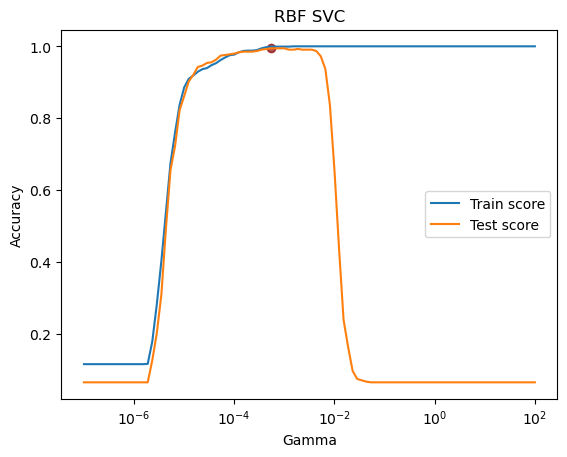

In [106]:
plt.plot(np.logspace(-7,2,100), train, label = 'Train score')
plt.plot(np.logspace(-7,2,100), test, label = 'Test score')
plt.xscale('log')
plt.legend()
plt.scatter(np.logspace(-7,2,100)[test.index(max(test))], max(test), marker='o', color = 'darkred', alpha=.7, label = 'Test Score maximum')


plt.ylabel('Accuracy')
plt.title('RBF SVC')
plt.xlabel('Gamma')

In [50]:
%time
best_model.predict(digits)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


array([0, 1, 2, ..., 8, 9, 8])

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
# model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
%time model.fit(X_train, y_train)

CPU times: user 15.7 ms, sys: 2.08 ms, total: 17.8 ms
Wall time: 17.3 ms


DecisionTreeClassifier(max_depth=10000000000.0)

In [46]:
train_t = []
test_t = []
for depth in np.logspace(0,10, 100):
    model = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    model.fit(X_train, y_train)
    tr = model.score(X_train, y_train)
    te = model.score(X_test, y_test)
    print('depth = %.1e, train: %.5f, test: %.5f'%(depth, tr, te))
    train_t.append(tr)
    test_t.append(te)
    if te == max(test_t): best_model_t  = model

depth = 1.0e+00, train: 0.19889, test: 0.19630
depth = 1.3e+00, train: 0.19889, test: 0.19630
depth = 1.6e+00, train: 0.19889, test: 0.19630
depth = 2.0e+00, train: 0.32299, test: 0.30926
depth = 2.5e+00, train: 0.32299, test: 0.30926
depth = 3.2e+00, train: 0.47733, test: 0.45926
depth = 4.0e+00, train: 0.58234, test: 0.55926
depth = 5.1e+00, train: 0.67701, test: 0.67593
depth = 6.4e+00, train: 0.80111, test: 0.77778
depth = 8.1e+00, train: 0.92681, test: 0.86111
depth = 1.0e+01, train: 0.97693, test: 0.87963
depth = 1.3e+01, train: 0.99602, test: 0.88148
depth = 1.6e+01, train: 1.00000, test: 0.87778
depth = 2.1e+01, train: 1.00000, test: 0.85926
depth = 2.6e+01, train: 1.00000, test: 0.87778
depth = 3.3e+01, train: 1.00000, test: 0.87407
depth = 4.1e+01, train: 1.00000, test: 0.88704
depth = 5.2e+01, train: 1.00000, test: 0.87407
depth = 6.6e+01, train: 1.00000, test: 0.87407
depth = 8.3e+01, train: 1.00000, test: 0.88333
depth = 1.0e+02, train: 1.00000, test: 0.87222
depth = 1.3e+

Text(0.5, 0, 'Maximum Depth')

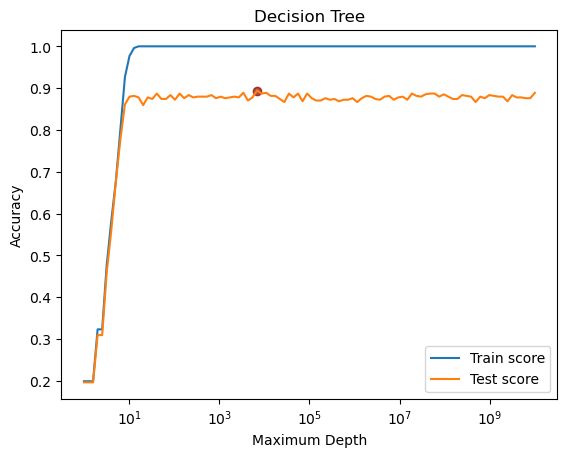

In [77]:
plt.plot(np.logspace(0,10,100), train_t, label = 'Train score')
plt.plot(np.logspace(0,10,100), test_t, label = 'Test score')
plt.xscale('log')
plt.legend()
plt.scatter(np.logspace(0,10,100)[38], .894, marker='o', color = 'darkred', alpha=.7, label = 'Test Score maximum')


plt.ylabel('Accuracy')
plt.title('Decision Tree')
plt.xlabel('Maximum Depth')

In [51]:
%time
best_model_t.predict(digits)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


array([0, 1, 2, ..., 8, 9, 8])

In [175]:
# model = LogisticRegression(tol=tol)
%time model.fit(X_train, y_train)

CPU times: user 10.1 ms, sys: 22.5 ms, total: 32.6 ms
Wall time: 113 ms


LogisticRegression(tol=10000.0)

In [79]:
from sklearn.linear_model import LogisticRegression

train_l = []
test_l = []
for tol in np.logspace(-20,4, 100):
    model = LogisticRegression(tol=tol)
    model.fit(X_train, y_train)
    tr = model.score(X_train, y_train)
    te = model.score(X_test, y_test)
    print('depth = %.1e, train: %.5f, test: %.5f'%(tol, tr, te))
    train_l.append(tr)
    test_l.append(te)
    if te == max(test_l): best_model_l  = model

/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 1.0e-20, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 1.7e-20, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 3.1e-20, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 5.3e-20, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 9.3e-20, train: 1.00000, test: 0.96296
depth = 1.6e-19, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 2.8e-19, train: 1.00000, test: 0.96296
depth = 5.0e-19, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 8.7e-19, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 1.5e-18, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 2.7e-18, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 4.6e-18, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 8.1e-18, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 1.4e-17, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 2.5e-17, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 4.3e-17, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 7.6e-17, train: 1.00000, test: 0.96296
depth = 1.3e-16, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 2.3e-16, train: 1.00000, test: 0.96296
depth = 4.0e-16, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 7.1e-16, train: 1.00000, test: 0.96296
depth = 1.2e-15, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 2.2e-15, train: 1.00000, test: 0.96296
depth = 3.8e-15, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 6.6e-15, train: 1.00000, test: 0.96296
depth = 1.1e-14, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 2.0e-14, train: 1.00000, test: 0.96296
depth = 3.5e-14, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 6.1e-14, train: 1.00000, test: 0.96296
depth = 1.1e-13, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.9e-13, train: 1.00000, test: 0.96296
depth = 3.3e-13, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 5.7e-13, train: 1.00000, test: 0.96296
depth = 1.0e-12, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 1.7e-12, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 3.1e-12, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 5.3e-12, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 9.3e-12, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 1.6e-11, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 2.8e-11, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 5.0e-11, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 8.7e-11, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 1.5e-10, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 2.7e-10, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 4.6e-10, train: 1.00000, test: 0.96296
depth = 8.1e-10, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.4e-09, train: 1.00000, test: 0.96296
depth = 2.5e-09, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 4.3e-09, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 7.6e-09, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.3e-08, train: 1.00000, test: 0.96296
depth = 2.3e-08, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 4.0e-08, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 7.1e-08, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 1.2e-07, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 2.2e-07, train: 1.00000, test: 0.96296
depth = 3.8e-07, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 6.6e-07, train: 1.00000, test: 0.96296
depth = 1.1e-06, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 2.0e-06, train: 1.00000, test: 0.96296
depth = 3.5e-06, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 6.1e-06, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 1.1e-05, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.9e-05, train: 1.00000, test: 0.96296
depth = 3.3e-05, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 5.7e-05, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 1.0e-04, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.7e-04, train: 1.00000, test: 0.96296
depth = 3.1e-04, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 5.3e-04, train: 1.00000, test: 0.96296
depth = 9.3e-04, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.6e-03, train: 1.00000, test: 0.96296
depth = 2.8e-03, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 5.0e-03, train: 1.00000, test: 0.96296
depth = 8.7e-03, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 1.5e-02, train: 1.00000, test: 0.96296
depth = 2.7e-02, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 4.6e-02, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

depth = 8.1e-02, train: 1.00000, test: 0.96296
depth = 1.4e-01, train: 1.00000, test: 0.96296


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


depth = 2.5e-01, train: 1.00000, test: 0.96296
depth = 4.3e-01, train: 1.00000, test: 0.96296
depth = 7.6e-01, train: 1.00000, test: 0.96296
depth = 1.3e+00, train: 1.00000, test: 0.95926
depth = 2.3e+00, train: 1.00000, test: 0.96481
depth = 4.0e+00, train: 1.00000, test: 0.96111
depth = 7.1e+00, train: 1.00000, test: 0.95926
depth = 1.2e+01, train: 1.00000, test: 0.95926
depth = 2.2e+01, train: 0.99523, test: 0.96481
depth = 3.8e+01, train: 0.98886, test: 0.95556
depth = 6.6e+01, train: 0.98329, test: 0.95000
depth = 1.1e+02, train: 0.96818, test: 0.95556
depth = 2.0e+02, train: 0.92045, test: 0.90370
depth = 3.5e+02, train: 0.91249, test: 0.90926
depth = 6.1e+02, train: 0.91249, test: 0.90926
depth = 1.1e+03, train: 0.89021, test: 0.89074
depth = 1.9e+03, train: 0.09865, test: 0.10000
depth = 3.3e+03, train: 0.09865, test: 0.10000
depth = 5.7e+03, train: 0.09865, test: 0.10000
depth = 1.0e+04, train: 0.09865, test: 0.10000


Text(0.5, 0, 'Tolerance')

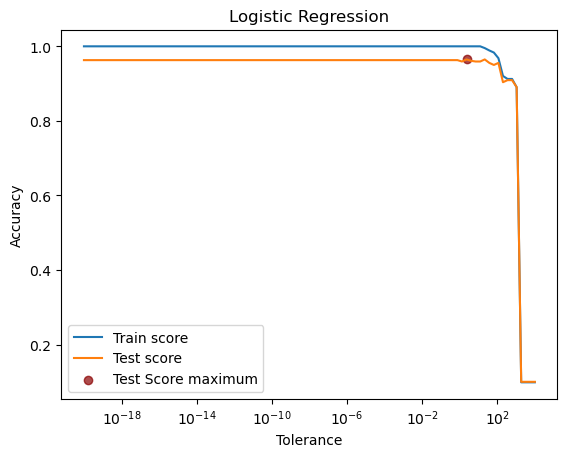

In [81]:
plt.plot(np.logspace(-20,4,100), train_l, label = 'Train score')
plt.plot(np.logspace(-20,4,100), test_l, label = 'Test score')
plt.scatter(2.31, .965, marker='o', color = 'darkred', alpha=.7, label = 'Test Score maximum')
plt.xscale('log')
plt.legend()

plt.ylabel('Accuracy')
plt.title('Logistic Regression')
plt.xlabel('Tolerance')

In [80]:
%time
best_model_l.predict(digits)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


array([0, 1, 2, ..., 8, 9, 8])

In [177]:
# model = KNeighborsClassifier(n_neighbors=n)
%time model.fit(X_train, y_train)

CPU times: user 1.64 ms, sys: 1 ms, total: 2.64 ms
Wall time: 1.71 ms


KNeighborsClassifier(n_neighbors=99)

In [87]:
from sklearn.neighbors import KNeighborsClassifier

train_k = []
test_k = []
for n in np.arange(1,100):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    tr = model.score(X_train, y_train)
    te = model.score(X_test, y_test)
    print('n = %.1e, train: %.5f, test: %.5f'%(n, tr, te))
    train_k.append(tr)
    test_k.append(te)
    if te == max(test_k): best_model_k  = model

n = 1.0e+00, train: 1.00000, test: 0.98704
n = 2.0e+00, train: 0.99204, test: 0.98704
n = 3.0e+00, train: 0.99602, test: 0.98333
n = 4.0e+00, train: 0.99125, test: 0.98519
n = 5.0e+00, train: 0.99125, test: 0.98519
n = 6.0e+00, train: 0.98648, test: 0.98519
n = 7.0e+00, train: 0.98648, test: 0.98519
n = 8.0e+00, train: 0.98329, test: 0.98148
n = 9.0e+00, train: 0.98329, test: 0.98519
n = 1.0e+01, train: 0.98250, test: 0.98333
n = 1.1e+01, train: 0.98329, test: 0.97963
n = 1.2e+01, train: 0.97852, test: 0.98148
n = 1.3e+01, train: 0.98250, test: 0.98333
n = 1.4e+01, train: 0.97932, test: 0.97778
n = 1.5e+01, train: 0.97772, test: 0.98148
n = 1.6e+01, train: 0.97772, test: 0.97593
n = 1.7e+01, train: 0.97454, test: 0.97222
n = 1.8e+01, train: 0.97454, test: 0.97037
n = 1.9e+01, train: 0.97056, test: 0.97222
n = 2.0e+01, train: 0.96977, test: 0.97222
n = 2.1e+01, train: 0.96977, test: 0.96852
n = 2.2e+01, train: 0.96818, test: 0.96667
n = 2.3e+01, train: 0.96818, test: 0.96296
n = 2.4e+01

Text(0.5, 0, 'Number of Neighbors')

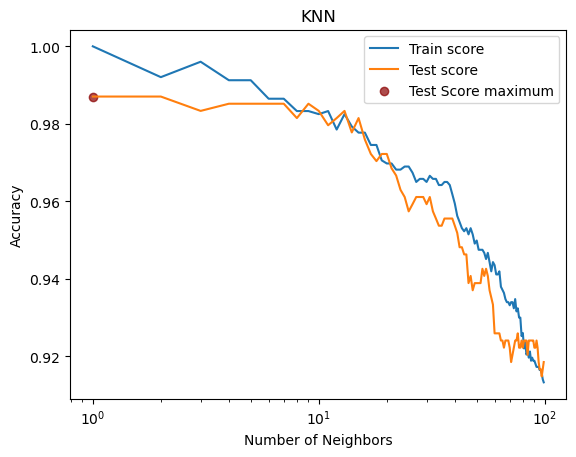

In [89]:
plt.plot(np.arange(1,100), train_k, label = 'Train score')
plt.plot(np.arange(1,100), test_k, label = 'Test score')
plt.scatter(np.arange(1,100)[test_k.index(max(test_k))], max(test_k), marker='o', color = 'darkred', alpha=.7, label = 'Test Score maximum')
plt.xscale('log')
plt.legend()

plt.ylabel('Accuracy')
plt.title('KNN')
plt.xlabel('Number of Neighbors')

In [91]:
%time
best_model_k.predict(digits)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs


array([0, 1, 2, ..., 8, 9, 8])